# Investigation of TMDb Movie Dataset 

## Introducion  -
#### The primary goal of the project is to go through the general data analysis process — using basic data analysis technique with NumPy, pandas, and Matplotlib. It contains four parts:
<li><a href='#intro'>Introduction </a></li>
<li><a href='#questions'>What are some good questions to ask looking at a dataset? </a></li>
<li><a href='#w&c'>Data Wrangling / cleaning</a></li>
<li><a href='#EDA'>Exploratory Data Analysis</a></li>
<li><a href ='#conclude'> Collaborate, visualise, communicate and conclude.</a></li>


<a id='intro'></a>
## Introduction
For this Data Analyst project, I selected the TMDb movie dataset from kaggle to investigate. According to kaggle introduction [page](https://www.kaggle.com/tmdb/tmdb-movie-metadata), the data contains information that are provided from The Movie Database (TMDb). It collects 5000+ movies and their rating and basic move information, including user ratings and revenue data.

### The potiental problem that can be discussed in the dataset:
Accroding Kaggle data overview, the dataset provides some metrics that measure how successful these movies are. These metrics include popularity, revenue and vote average. It also contains some basic information corresponding to the movie like cast, director, keywords, runtime, genres, etc. Any of the basic information can be a key to a success movie. More specificly, these factors can be classified to two categrories as follows:
#### Metrics  for Evaluating the Success Movie
- popularity
- revenue
- vote average score

#### Potential Key to Affect the Success of a Movie
- Budget
- Cast
- Director
- Keywords
- Runtime
- Genres
- Release Date
- Vote Average

<a id = 'questions'></a>
## Questionings

**1. Let's define those primary questions here:**
<li><a href = '#expensive'>1. Which are the 5 most expensive movies? Comparison between the extremes.</a></li>
<li><a href = '#profit'>2. Top 5 most profitable movies? Comparison between the min and max profits.</a></li>
<li><a href = '#talked'>3. Most talked about Movies?</a></li>
<li><a href = '#runtime'>4. Average runtime of movies?</a></li>
<li><a href = '#above7'>5. Movies which are rated above 7 by the critics?</a></li>
<li><a href = '#yearvsprofit'>6. Which year did we have the most profitable movies?</a></li>

**2. Then there will be a set of seconday questions related to the questions above**
<li><a href = '#successful'>1. Most successful genre.</a></li>
<li><a href = '#cast'>2. Frequent Cast in movies.</a></li>
<li><a href = '#budget'>3. Average budget of the profitable movies.</a></li>
<li><a href = '#successful_profit'>4. Average duration of the most profitable movies.</a></li>
<li><a href = '#language'>5. Language of the most profitable movies.</a></li>

**3. General Explore**
<li><a href = '#pptvsyears'>1. Popularity Over Years</a></li>
<li><a href = '#pptvsrevenue'>2. The distribution of revenue in different popularity levels in recent five years.</a></li>
<li><a href = '#pptvsscorerate'>3. The distribution of revenue in different score rating levels in recent five years.</a></li>

In [1]:
# Importing the required packages 

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import warnings # Current version of Seaborn generates a bunch of warnings that will be ignored.
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
credits = pd.read_csv('tmdb_5000_credits.csv')
movies = pd.read_csv('tmdb_5000_movies.csv')
print(credits.columns)
print(movies.columns)

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [3]:
# merging movies version 2
moviesv1 = pd.merge(movies, credits, left_on='id', right_on='movie_id', how = 'left', suffixes=('','_y'))
moviesv1.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [4]:
print(moviesv1.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew'],
      dtype='object')


<a id = 'w&c'></a>
### Data wrangling and Cleaning Process

After observing the dataset and proposed questions for the analysis we will be keeping only relevent data deleting the unsued data so that we can make our calculation easy and understandable. .

#### Steps to be taken to clean the data.
1. We need to remove unused column such as id, imdb_id, vote_count, production_company, keywords, homepage etc.
2. Removing the duplicacy in the rows(if any).
3. Some movies in the database have zero budget or zero revenue, that is there value has not been recorded so we will be discarding such entries.
4. Changing release date column into date format.
5. Replacing zero with NaN in runtime column.
6. Changing format of budget and revenue column.

In [5]:
# First step is to clean the data and see which are the redundant or unnecessary cols

del_col_list = ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 'production_companies',
                'overview', 'original_title', 'title_y']

moviesv1 = moviesv1.drop(del_col_list, axis=1)
moviesv1.head(2)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [6]:
moviesv1.to_csv('moviesv1.csv')

In [7]:
print(moviesv1.shape)
moviesv1 = moviesv1.drop_duplicates(keep = 'first')
print(moviesv1.shape)

(4803, 15)
(4803, 15)


In [8]:
# replacing all the zeros from revenue and budget cols.
cols = ['budget','revenue']
moviesv1[cols] = moviesv1[cols].replace(0,np.nan)
# Dropping all rows in the above colomns with na in the list
moviesv1.dropna(subset=cols,inplace = True)
moviesv1.shape

(3229, 15)

In [9]:
#Changing the release_date column to Date-Time column
moviesv1.release_date = pd.to_datetime(moviesv1['release_date'])
moviesv1.head(2)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [10]:
# Now we need to extract 'release year' from 'release_date'
moviesv1['release_year'] = moviesv1['release_date'].dt.year
moviesv1.head(2)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew,release_year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007


In [11]:
# Changing the data type of the above mentioned columns
change_col = ['budget','revenue']
moviesv1[change_col] = moviesv1[change_col].applymap(np.int64)
moviesv1.dtypes

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
movie_id                         int64
cast                            object
crew                            object
release_year                     int64
dtype: object

### Cleaning Decision Summary
1. Drop unnecessary columns for answering those questions : `homepage`, `tagline`, `imdb_id`, `overview`,`budget_adj`, `revenue_adj`, `Keywords`, `status`, `original_language`, `production_companies`, `original_title`, `title_y`.
2. Drop duplicates.
3. Drop null values columns that with small quantity of nulls : `cast`, `director`, and `genres`.
4. Replace zero values with null values in the `budget` and `revenue` column.
5. Drop zero values columns that with small quantity of zeros : `runtime`.
6. Changed the Date and time format for year extraction.


<a id ='EDA'></a>
## Exploratory Data Analysis
### How to handle the Json in Dataset?

>The main problem with this dataset is the .json format. Many columns in the dataset are in json format, therefore cleaning the dataset was the main challenge. For people who don't know about JSON(JavaScript Object Notation), it is basically a syntax for storing and exchanging data between two computers. It is mainly in a key:value format, and is embedded into a string.

In [12]:
# We are going to write a function that changes json data to list

def conv_col(col, key):
    '''
    Arguments - 
    col - (string) - Name of the string, which the function needs to be applied
    kye - (string) - Name of the dictionary key, which the value needs to be extracted
    '''
    for index, i in zip(moviesv1.index,moviesv1[col].apply(json.loads)):
        list1 = []
        for j in range(len(i)):
            list1.append(i[j][key])
        moviesv1.loc[index,col] = str(list1)

conv_col('genres','name')
conv_col('production_countries','name')
conv_col('spoken_languages','name')
conv_col('cast','name')

In [13]:
moviesv1.head(2)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,19995,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007


##### Defining a function for Minimums and Maximums

In [14]:
def find_min_max_in(col):
    '''
    The function takes in column name and returns top 5 and bottom 5 movies dataframe in that column.
    arugs: 
        col = string(column name)
    returns:
        info_data = dataframe(final 5 movies dataframe)
    '''
    top = moviesv1[col].idxmax()
    top_df = pd.DataFrame(moviesv1.loc[top])
    
    bottom = moviesv1[col].idxmin()
    bottom_df = pd.DataFrame(moviesv1.loc[bottom])
    
    info_df = pd.concat([top_df,bottom_df],axis = 1)
    return info_df
find_min_max_in('budget')

,17,4238
budget,380000000,1
genres,"['Adventure', 'Action', 'Fantasy']","['Drama', 'Comedy']"
id,1865,3082
popularity,135.414,28.2765
production_countries,['United States of America'],['United States of America']
release_date,2011-05-14 00:00:00,1936-02-05 00:00:00
revenue,1045713802,8500000
runtime,136,87
spoken_languages,"['English', 'Español']",['English']
title,Pirates of the Caribbean: On Stranger Tides,Modern Times


<a id = 'expensive'></a>
### Top 5 expensive movies

In [15]:
# To find the top 5 expensive movies, we will sort the data according to the budget of each movie
expensive_moviesv1 = moviesv1.sort_values(by = 'budget',ascending=False).head()
expensive_moviesv1

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew,release_year
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,1865,"['Johnny Depp', 'Penélope Cruz', 'Ian McShane'...","[{""credit_id"": ""566b4f54c3a3683f56005151"", ""de...",2011
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,99861,"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...",2015
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400,1452,"['Brandon Routh', 'Kevin Spacey', 'Kate Boswor...","[{""credit_id"": ""553bef6a9251416874003c8f"", ""de...",2006
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,49529,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012


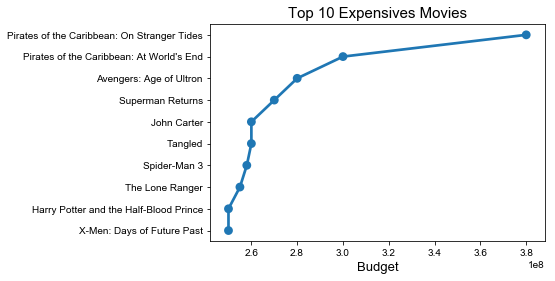

In [16]:
#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(moviesv1['budget'].sort_values(ascending = False))
info['title'] = moviesv1['title']
data = list(map(str,(info['title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(20,10)})
ax.set_title("Top 10 Expensives Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")

<a id ='profit'></a>
### Top 5 profitable movies

In [17]:
# we are going to create a new column "profit"
moviesv1['profit'] = moviesv1['revenue'] - moviesv1['budget']
col = ['budget',
       'revenue',
       'profit',
       'title',
       'genres',
       'id',
       'popularity',
       'production_countries',
       'release_date',
       'release_year',
       'runtime',
       'spoken_languages',
       'cast',
       'vote_average',
       'vote_count']
moviesv1 = moviesv1[col]
moviesv1.head(2)

,budget,revenue,profit,title,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,cast,vote_average,vote_count
0,237000000,2787965087,2550965087,Avatar,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2009,162.0,"['English', 'Español']","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,11800
1,300000000,961000000,661000000,Pirates of the Caribbean: At World's End,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,2007,169.0,['English'],"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,4500


In [18]:
find_min_max_in('profit')

,0,13
budget,237000000,255000000
revenue,2787965087,89289910
profit,2550965087,-165710090
title,Avatar,The Lone Ranger
genres,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Action', 'Adventure', 'Western']"
id,19995,57201
popularity,150.438,49.047
production_countries,"['United States of America', 'United Kingdom']",['United States of America']
release_date,2009-12-10 00:00:00,2013-07-03 00:00:00
release_year,2009,2013


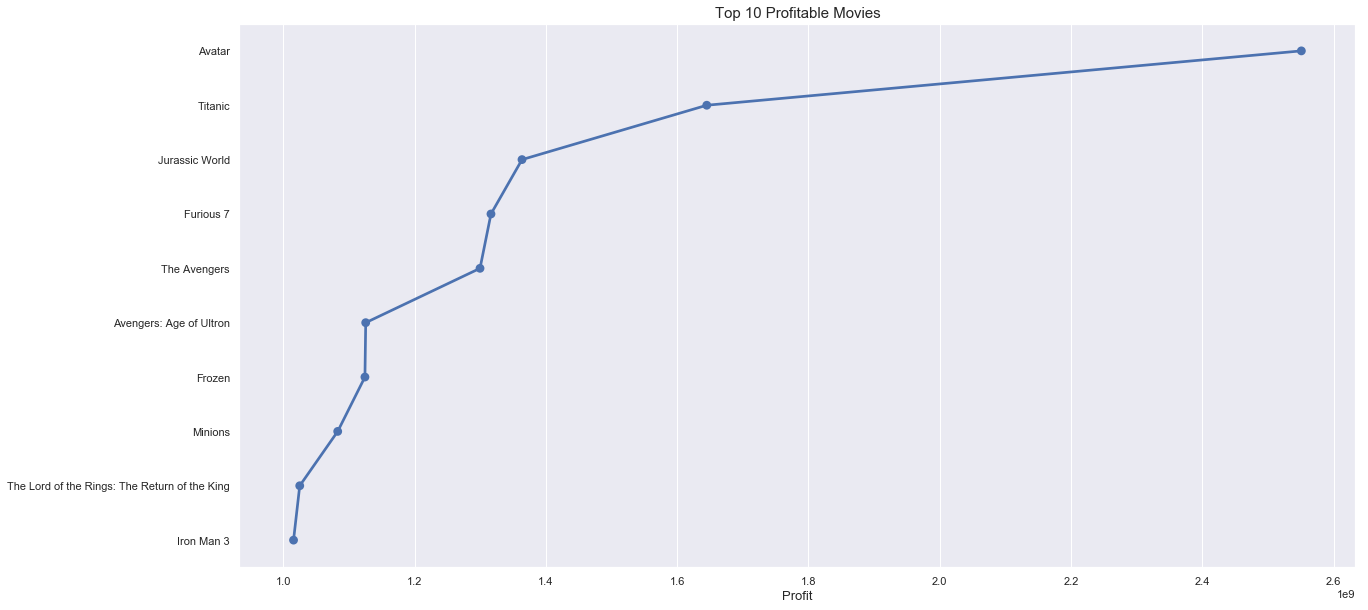

In [19]:
#make a plot which contain top 10 movies which earn highest profit.
#sort the 'Profit' column in decending order and store it in the new dataframe,
info = pd.DataFrame(moviesv1['profit'].sort_values(ascending = False))
info['title'] = moviesv1['title']
data = list(map(str,(info['title'])))
x = list(data[:10])
y = list(info['profit'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(20,10)})
#setup the title and labels of the plot.
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")

<a id = 'talked'></a>
### Most talked(popular) movies all time

In [20]:
# to find the most talked about movies, we can sort the dataframe on the popularity column
popular_movies = moviesv1.sort_values(by ='popularity', ascending=False).head()
popular_movies.head()

,budget,revenue,profit,title,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,cast,vote_average,vote_count
546,74000000,1156730962,1082730962,Minions,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,2015,91.0,['English'],"['Sandra Bullock', 'Jon Hamm', 'Michael Keaton...",6.4,4571
95,165000000,675120017,510120017,Interstellar,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,2014,169.0,['English'],"['Matthew McConaughey', 'Jessica Chastain', 'A...",8.1,10867
788,58000000,783112979,725112979,Deadpool,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,2016,108.0,['English'],"['Ryan Reynolds', 'Morena Baccarin', 'Ed Skrei...",7.4,10995
94,170000000,773328629,603328629,Guardians of the Galaxy,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,2014,121.0,['English'],"['Chris Pratt', 'Zoe Saldana', 'Dave Bautista'...",7.9,9742
127,150000000,378858340,228858340,Mad Max: Fury Road,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,2015,120.0,['English'],"['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...",7.2,9427


In [21]:
# comparision btwn max and min
find_min_max_in('popularity')

,546,3921
budget,74000000,3000000
revenue,1156730962,6804016
profit,1082730962,3804016
title,Minions,Woman Thou Art Loosed
genres,"['Family', 'Animation', 'Adventure', 'Comedy']",['Drama']
id,211672,44634
popularity,875.581,0.019984
production_countries,['United States of America'],['United States of America']
release_date,2015-06-17 00:00:00,2004-09-30 00:00:00
release_year,2015,2004


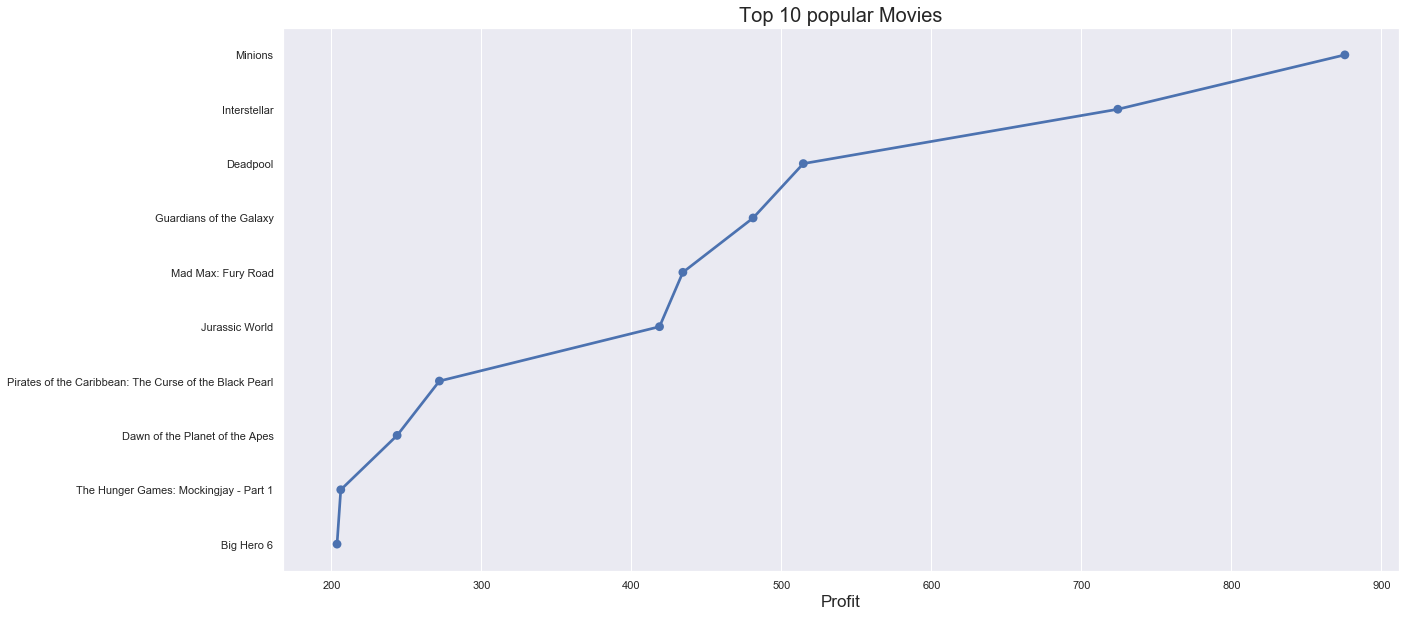

In [22]:
#make a plot which contain top 10 movies which earn highest profit.
#sort the 'Profit' column in decending order and store it in the new dataframe,
info = pd.DataFrame(moviesv1['popularity'].sort_values(ascending = False))
info['title'] = moviesv1['title']
data = list(map(str,(info['title'])))
x = list(data[:10])
y = list(info['popularity'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(20,10)})
#setup the title and labels of the plot.
ax.set_title("Top 10 popular Movies",fontsize = 20)
ax.set_xlabel("Profit",fontsize = 17)
sns.set_style("darkgrid")

<a id = 'runtime'></a>
### Most Runtime with max and min  

In [23]:
# sorting on basis of runtime
runtime_movies = moviesv1.sort_values(by = 'runtime', ascending=False)
runtime_movies.head()

,budget,revenue,profit,title,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,cast,vote_average,vote_count
2384,18000000,871279,-17128721,Carlos,"['Crime', 'Drama', 'Thriller', 'History']",43434,1.138383,"['France', 'Germany']",2010-05-19,2010,338.0,"['Français', 'Deutsch', 'English', 'Español', ...","['Edgar Ramírez', 'Alexander Scheer', 'Fadi Ab...",6.7,50
1125,31115000,71000000,39885000,Cleopatra,"['Drama', 'History', 'Romance']",8095,13.244365,"['United Kingdom', 'United States of America',...",1963-06-12,1963,248.0,"['English', 'Português']","['Elizabeth Taylor', 'Richard Burton', 'Rex Ha...",6.7,146
3813,4000000,400176459,396176459,Gone with the Wind,"['Drama', 'Romance', 'War']",770,48.982550,['United States of America'],1939-12-15,1939,238.0,['English'],"['Vivien Leigh', 'Clark Gable', 'Olivia de Hav...",7.7,970
4497,600000,34505110,33905110,Woodstock,"['History', 'Documentary', 'Music']",9459,3.409764,['United States of America'],1970-03-26,1970,225.0,['English'],"['Joe Cocker', 'Richie Havens', 'Joan Baez', '...",7.1,66
1109,44000000,3484331,-40515669,Heaven's Gate,"['Action', 'Drama', 'History', 'Western']",10935,5.380124,['United States of America'],1980-11-19,1980,219.0,"['English', 'Français', 'Deutsch', 'Polski', '...","['Kris Kristofferson', 'Christopher Walken', '...",6.4,55


In [24]:
# max and min for runtime
find_min_max_in('runtime')

,2384,3626
budget,18000000,5000000
revenue,871279,4074023
profit,-17128721,-925977
title,Carlos,Sea Rex 3D: Journey to a Prehistoric World
genres,"['Crime', 'Drama', 'Thriller', 'History']",['Documentary']
id,43434,78394
popularity,1.13838,4.49837
production_countries,"['France', 'Germany']","['France', 'United Kingdom']"
release_date,2010-05-19 00:00:00,2010-05-14 00:00:00
release_year,2010,2010


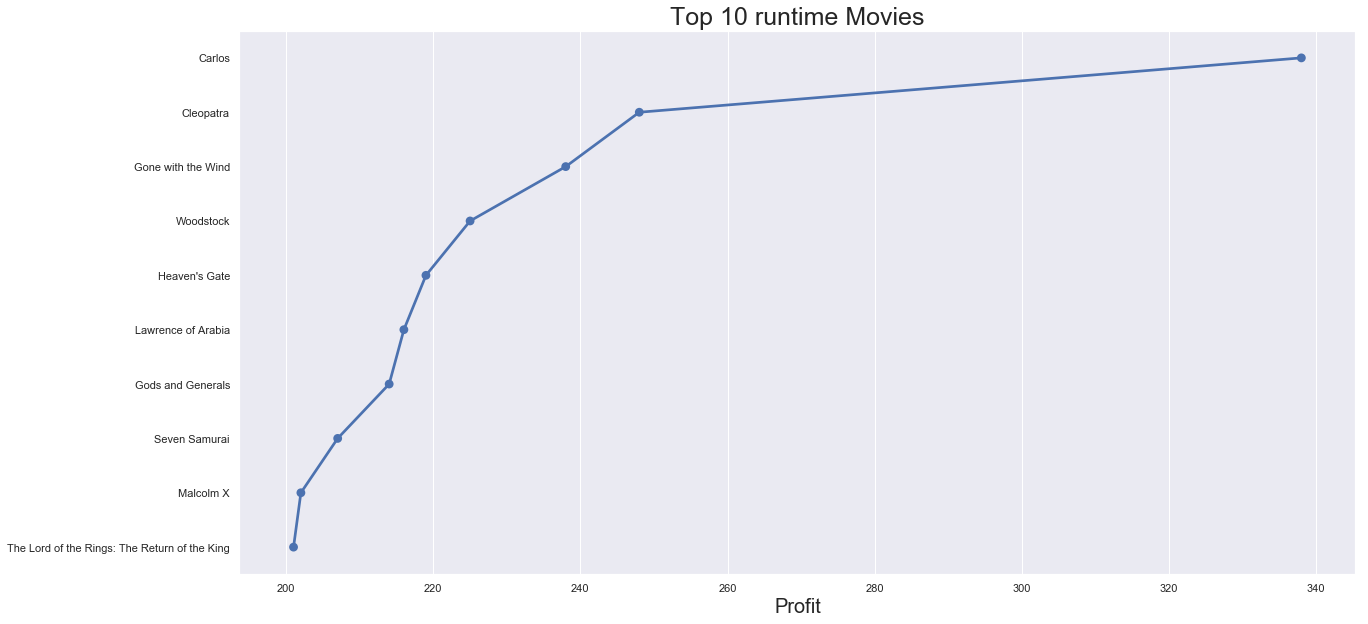

In [25]:
#make a plot which contain top 10 movies which earn highest profit.
#sort the 'Profit' column in decending order and store it in the new dataframe,
info = pd.DataFrame(moviesv1['runtime'].sort_values(ascending = False))
info['title'] = moviesv1['title']
data = list(map(str,(info['title'])))
x = list(data[:10])
y = list(info['runtime'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(20,10)})
#setup the title and labels of the plot.
ax.set_title("Top 10 runtime Movies",fontsize = 25)
ax.set_xlabel("Profit",fontsize = 20)
sns.set_style("darkgrid")

In [26]:
# mean of runtime 
moviesv1['runtime'].mean()

110.72437287085785

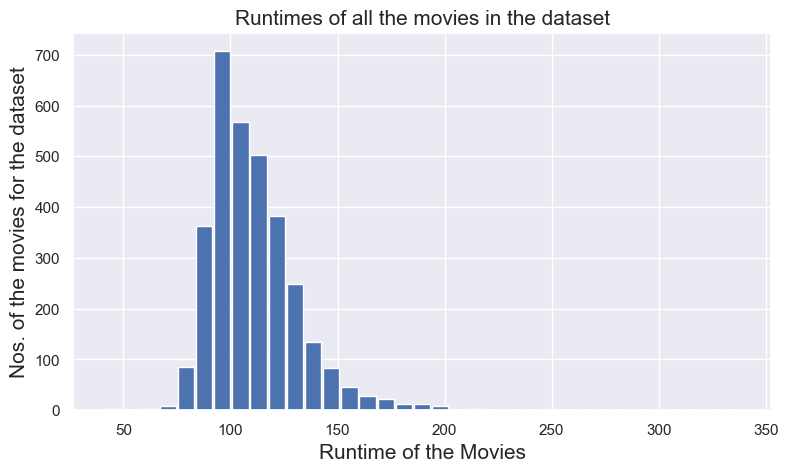

In [27]:
# graphing the above dataset
plt.figure(figsize = (9,5),dpi = 100)
plt.xlabel('Runtime of the Movies',fontsize = 15)
plt.ylabel('Nos. of the movies for the dataset', fontsize = 15)
plt.title('Runtimes of all the movies in the dataset', fontsize = 15)
plt.hist(moviesv1['runtime'],rwidth=0.9, bins=35)
plt.show()

<a id  = 'above7'></a>
### Movies above 7 rating

In [28]:
moviesv1[moviesv1['vote_average']>=7.0]

,budget,revenue,profit,title,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,cast,vote_average,vote_count
0,237000000,2787965087,2550965087,Avatar,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2009,162.0,"['English', 'Español']","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,11800
3,250000000,1084939099,834939099,The Dark Knight Rises,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,2012,165.0,['English'],"['Christian Bale', 'Michael Caine', 'Gary Oldm...",7.6,9106
6,260000000,591794936,331794936,Tangled,"['Animation', 'Family']",38757,48.681969,['United States of America'],2010-11-24,2010,100.0,['English'],"['Zachary Levi', 'Mandy Moore', 'Donna Murphy'...",7.4,3330
7,280000000,1405403694,1125403694,Avengers: Age of Ultron,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,2015,141.0,['English'],"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",7.3,6767
8,250000000,933959197,683959197,Harry Potter and the Half-Blood Prince,"['Adventure', 'Fantasy', 'Family']",767,98.885637,"['United Kingdom', 'United States of America']",2009-07-07,2009,153.0,['English'],"['Daniel Radcliffe', 'Rupert Grint', 'Emma Wat...",7.4,5293
12,200000000,1065659812,865659812,Pirates of the Caribbean: Dead Man's Chest,"['Adventure', 'Fantasy', 'Action']",58,145.847379,"['Jamaica', 'United States of America', 'Baham...",2006-06-20,2006,151.0,"['English', 'Türkçe', 'ελληνικά', '普通话']","['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",7.0,5246
16,220000000,1519557910,1299557910,The Avengers,"['Science Fiction', 'Action', 'Adventure']",24428,144.448633,['United States of America'],2012-04-25,2012,143.0,['English'],"['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",7.4,11776
19,250000000,956019788,706019788,The Hobbit: The Battle of the Five Armies,"['Action', 'Adventure', 'Fantasy']",122917,120.965743,"['New Zealand', 'United States of America']",2014-12-10,2014,144.0,['English'],"['Martin Freeman', 'Ian McKellen', 'Richard Ar...",7.1,4760
22,250000000,958400000,708400000,The Hobbit: The Desolation of Smaug,"['Adventure', 'Fantasy']",57158,94.370564,"['New Zealand', 'United States of America']",2013-12-11,2013,161.0,['English'],"['Martin Freeman', 'Ian McKellen', 'Richard Ar...",7.6,4524
25,200000000,1845034188,1645034188,Titanic,"['Drama', 'Romance', 'Thriller']",597,100.025899,['United States of America'],1997-11-18,1997,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...","['Kate Winslet', 'Leonardo DiCaprio', 'Frances...",7.5,7562


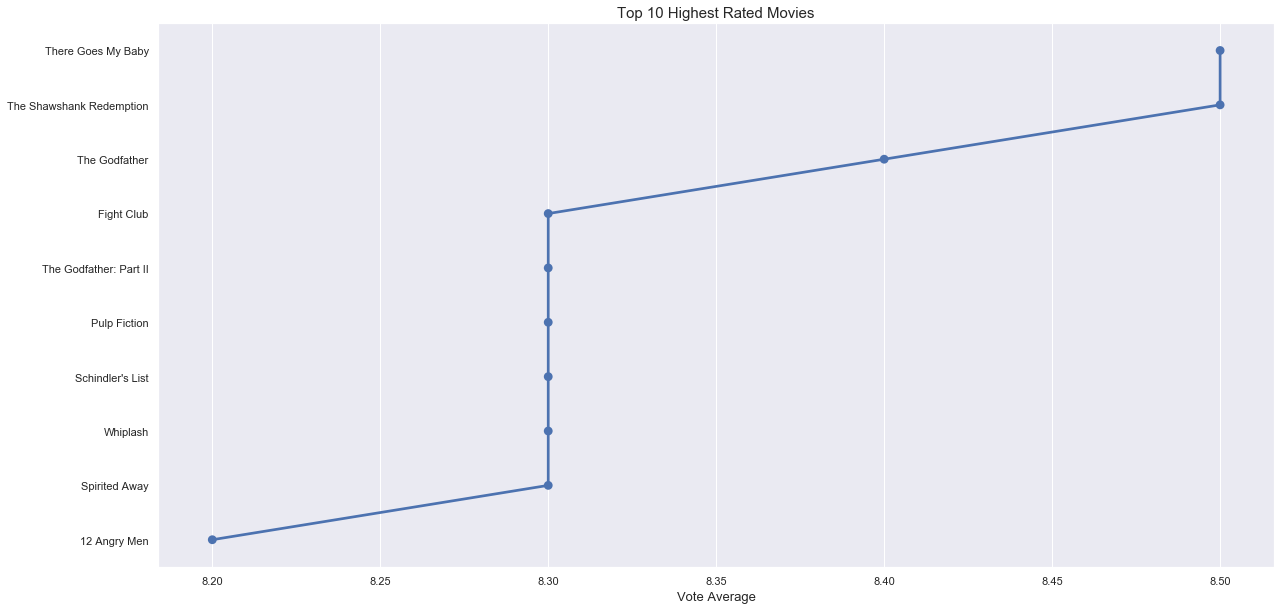

In [29]:
#top 10 highets rated movies.
#sort the 'vote_average' column in decending order and store it in the new dataframe.
info = pd.DataFrame(moviesv1['vote_average'].sort_values(ascending = False))
info['original_title'] = moviesv1['title']
data = list(map(str,(info['original_title'])))

##extract the top 10 highly rated movies data from the list and dataframe.
x = list(data[:10])
y = list(info['vote_average'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("Vote Average",fontsize = 13)
#setup the stylesheet
sns.set_style("darkgrid")

<a id = 'yearvsprofit'></a>
### The Years with most profitable movies occured

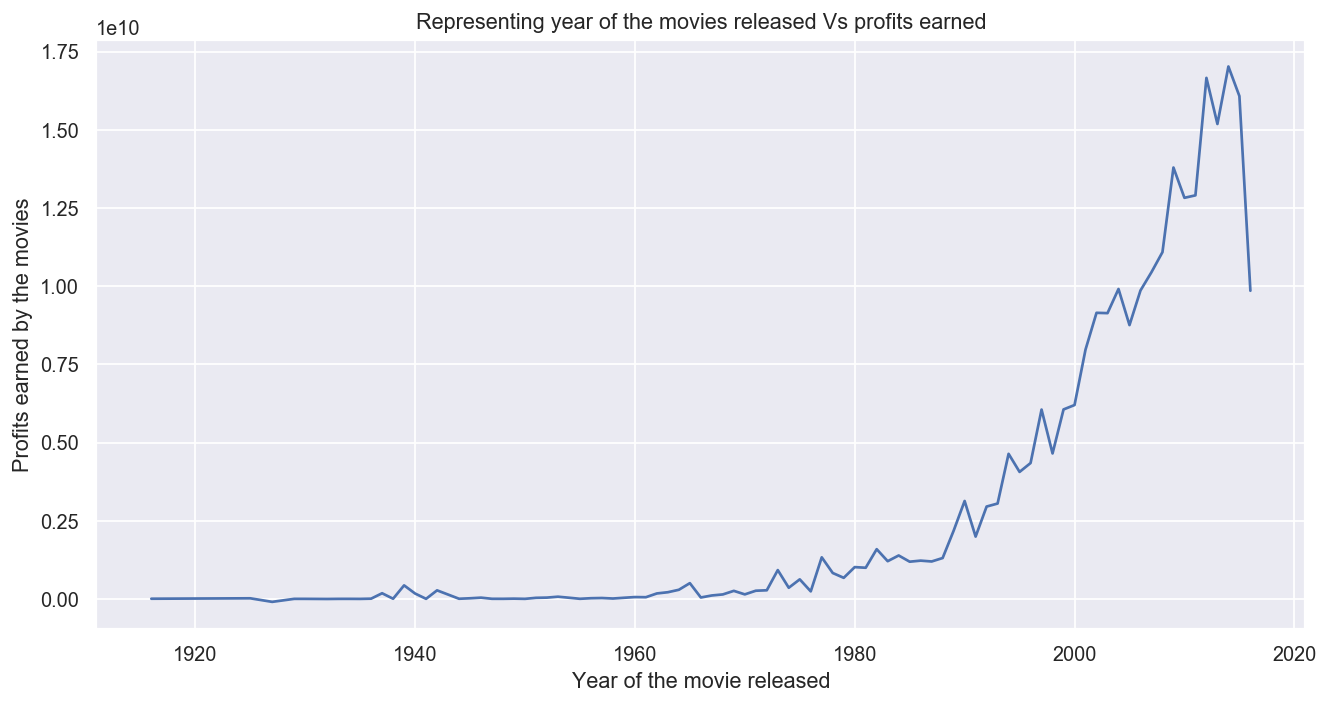

In [30]:
# Grouping the data accordingly
profit_year = moviesv1.groupby('release_year')['profit'].sum()
plt.figure(figsize=(12,6),dpi = 130)
plt.xlabel('Year of the movie released',fontsize = 12)
plt.ylabel('Profits earned by the movies', fontsize = 12)
plt.title('Representing year of the movies released Vs profits earned')
plt.plot(profit_year)
plt.show()

In [31]:
# Most profitable year
profit_year.idxmax()

2014

### Answering  secondary questions

In [32]:
# filtering out the profit(more than $50M) data from the dataset
profit_data = moviesv1[moviesv1['profit']>=50000000]
profit_data.index = range(len(profit_data))
profit_data.index = profit_data.index + 1
profit_data.head(3)

,budget,revenue,profit,title,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,cast,vote_average,vote_count
1,237000000,2787965087,2550965087,Avatar,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2009,162.0,"['English', 'Español']","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,11800
2,300000000,961000000,661000000,Pirates of the Caribbean: At World's End,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,2007,169.0,['English'],"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,4500
3,245000000,880674609,635674609,Spectre,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,2015,148.0,"['Français', 'English', 'Español', 'Italiano',...","['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",6.3,4466


<a id = 'successful'></a>
### Most Successful Genres

In [33]:
# Changing the format of the data
profit_data['genres'] = profit_data['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
profit_data['genres'] = profit_data['genres'].str.split(',')
profit_data.head(2)

,budget,revenue,profit,title,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,cast,vote_average,vote_count
1,237000000,2787965087,2550965087,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2009,162.0,"['English', 'Español']","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,11800
2,300000000,961000000,661000000,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",285,139.082615,['United States of America'],2007-05-19,2007,169.0,['English'],"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,4500


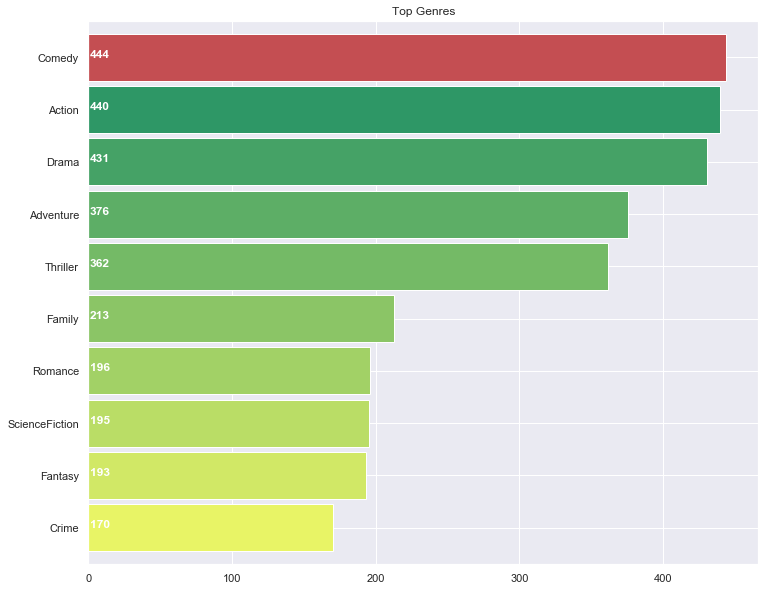

In [34]:
# Graphing the above data
plt.subplots(figsize = (12,10))
list1 = []
for i in profit_data['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending = True).plot.barh(
    width = 0.9,
    color = sns.color_palette('summer_r',10))

for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending = True).values):
    ax.text(.8,i,v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Genres')
plt.show()

<a id = 'cast'></a>
### Most frequent Cast

In [35]:
profit_data['cast'] = profit_data['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
profit_data['cast'] = profit_data['cast'].str.split(',')
profit_data.head(2)

,budget,revenue,profit,title,genres,id,popularity,production_countries,release_date,release_year,runtime,spoken_languages,cast,vote_average,vote_count
1,237000000,2787965087,2550965087,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2009,162.0,"['English', 'Español']","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",7.2,11800
2,300000000,961000000,661000000,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",285,139.082615,['United States of America'],2007-05-19,2007,169.0,['English'],"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",6.9,4500


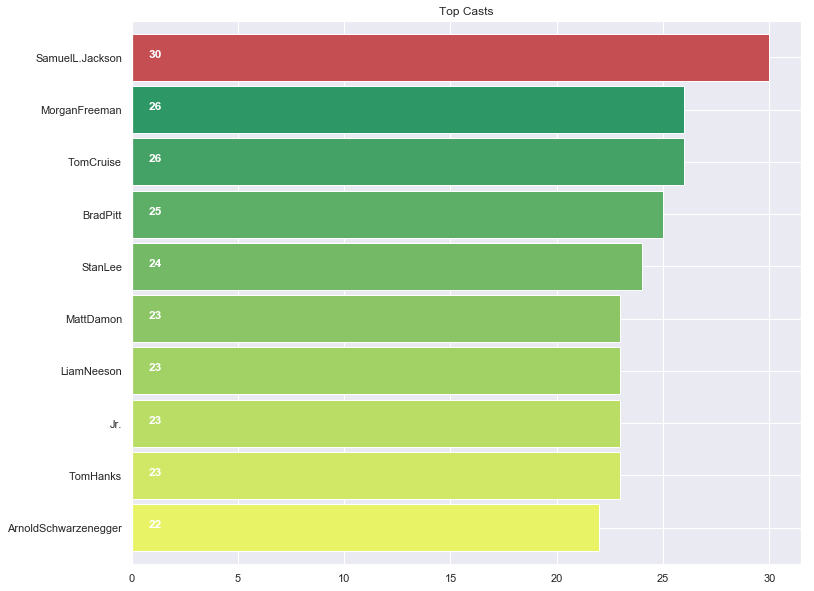

In [36]:
# Graphing the above data
plt.subplots(figsize = (12,10))
list1 = []
for i in profit_data['cast']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending = True).plot.barh(width=0.9,color=sns.color_palette('summer_r',10))

for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending = True).values):
    ax.text(.8,i,v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Casts')
plt.show()

<a id = 'budget'></a>
### Average Budget of profitable movies

In [37]:
profit_data['budget'].mean()

63032056.92111554

<a id = 'successful_profit'></a>
### Average Runtime of profitable movies

In [38]:
profit_data['runtime'].mean()

114.37928286852589

<a id = 'language'></a>
### Language of the most profitable movies.

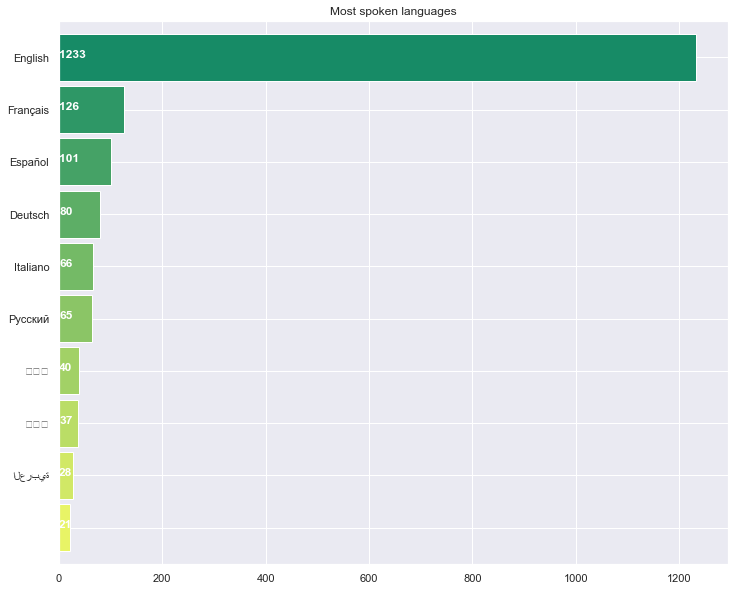

In [39]:
profit_data['spoken_languages'] = profit_data['spoken_languages'].str.strip('[]').str.replace(' ','').str.replace("'",'')
profit_data['spoken_languages'] = profit_data['spoken_languages'].str.split(',')

plt.subplots(figsize = (12,10))
list1 = []
for i in profit_data['spoken_languages']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width = 0.9,color=sns.color_palette('summer_r',10))

for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values):
    ax.text(.8,i,v,fontsize=12,color='white',weight='bold')
plt.title('Most spoken languages')
plt.show()

<a id = 'pptvsyears'></a>
### Popularity over years

In [40]:
p_mean = moviesv1.groupby('release_year').mean()['popularity']
p_mean.tail()

release_year
2012    35.457552
2013    38.388110
2014    61.606583
2015    63.293609
2016    51.806021
Name: popularity, dtype: float64

In [41]:
p_median = moviesv1.groupby('release_year').median()['popularity']
p_median.tail()

release_year
2012    27.908783
2013    34.613317
2014    42.472324
2015    40.371098
2016    42.519413
Name: popularity, dtype: float64

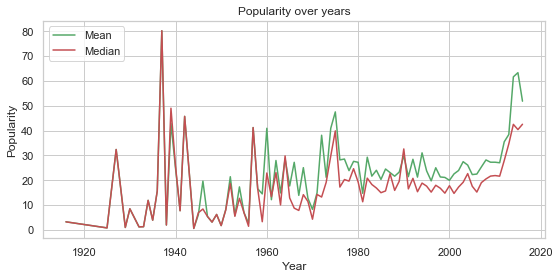

In [42]:
# Graphing the above data
# indexing for the x-axis
index_mean = p_mean.index
index_median = p_median.index
sns.set_style('whitegrid') # Setting style for the graph
x1, y1 = index_mean, p_mean
x2,y2 = index_median,p_median
plt.figure(figsize=(9,4))
plt.plot(x1,y1, color = 'g',label = 'Mean')
plt.plot(x2,y2, color = 'r', label = "Median")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title('Popularity over years')
plt.legend(loc='upper left')

<a id = 'pptvsrevenue'></a>
### Distribution of revenue in different popularity levels in recent five years.

In [43]:
# quartile function
def cut_into_quantile(dfname ,column_name):
# find quartile, max and min values
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four budget level groups
    bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 
# Creates budget_levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return dfname

In [44]:
#choose the recent five years 
dfyear =[2012,2013,2014,2015,2016]
#creat a empty dataframe,df_q2
df_q2 = pd.DataFrame()

#for each year, do the following procedure
for year in dfyear:
    dfn = moviesv1.query('release_year == "%s"' % year) # first filter dataframe with the selected year 
    dfn2 = cut_into_quantile(dfn,'revenue') #apply the cut_into_quantile with the selected frame, store it to dfn2 
    df_q2 = df_q2.append(dfn2) #append dfn2 to df_q2
df_q2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 3 to 4720
Data columns (total 16 columns):
budget                  617 non-null int64
revenue                 617 non-null int64
profit                  617 non-null int64
title                   617 non-null object
genres                  617 non-null object
id                      617 non-null int64
popularity              617 non-null float64
production_countries    617 non-null object
release_date            617 non-null datetime64[ns]
release_year            617 non-null int64
runtime                 617 non-null float64
spoken_languages        617 non-null object
cast                    617 non-null object
vote_average            617 non-null float64
vote_count              617 non-null int64
revenue_levels          617 non-null category
dtypes: category(1), datetime64[ns](1), float64(3), int64(6), object(5)
memory usage: 77.9+ KB


In [45]:
dfq2_summary = df_q2.groupby(['release_year','revenue_levels']).median()
dfq2_summary.tail(8)

budget      revenue       profit        id  \
release_year revenue_levels                                                     
2015         Low               10000000.0    6420319.0   -3812888.0  256962.0   
             Medium            15000000.0   53650445.0   37845955.0  275194.0   
             Moderately High   42000000.0  122029380.0   68971857.5  269182.5   
             High             110000000.0  455547184.5  323047184.5  213214.0   
2016         Low               16500000.0   16117947.0   -3723252.5  317501.0   
             Medium            21000000.0   73205685.0   45641956.5  317776.0   
             Moderately High   45000000.0  157641513.5   84987412.5  295184.0   
             High             162500000.0  424581048.5  287827461.0  259091.0   

                              popularity  runtime  vote_average  vote_count  
release_year revenue_levels                                                  
2015         Low               16.318608    105.0          5.60       318.0  
             Medium            32.897577    109.0          6.55       961.5  
             Moderately High   46.901750    118.0          6.35      1296.0  
             High             103.020302    119.5          6.60      3132.0  
2016         Low               22.292246    114.0          6.25       463.0  
             Medium            33.431048    104.5          6.30       729.0  
             Moderately High   53.444525    108.5          6.00      1492.5  
             High              62.894908    121.0          6.35      2529.5

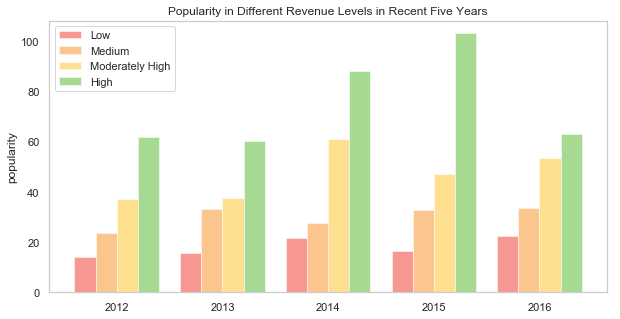

In [46]:
# Setting the positions and width for the bars
pos = list(range(len(dfq2_summary.query('revenue_levels =="Low"'))))
width = 0.2 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with Low data, in position pos,
plt.bar(pos, 
        #using 'Low' data,
        dfq2_summary.query('revenue_levels =="Low"')['popularity'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label Low
        label= 'Low') 

# Create a bar with Medium data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using Medium data,
        dfq2_summary.query('revenue_levels =="Medium"')['popularity'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label Medium
        label='Medium') 

# Create a bar with Moderately High data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using Moderately High data,
        dfq2_summary.query('revenue_levels =="Moderately High"')['popularity'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label Moderately High
        label='Moderately High') 

# Create a bar with High data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using High data,
        dfq2_summary.query('revenue_levels =="High"')['popularity'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#4fb427', 
        # with label High
        label='High')

# Set the y axis label
ax.set_ylabel('popularity')

# Set the chart's title
ax.set_title('Popularity in Different Revenue Levels in Recent Five Years')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels([2012,2013,2014,2015,2016])

# Adding the legend and showing the plot
plt.legend( loc='upper left')
plt.grid()
plt.show()

**We can see that movies with higher revenue level are with higher popularity in recent five years.**

We can see that revenue level has postive relation with popularity. The result is reasonable since it makes me think of if movie producer wants to make high revenue movies, the first thing they always is **to promote it and make it popular.** So according the result from the previous question, I infer that a high revenue movie is always with a higher popularity than movies with lower revenue levels. So if we define success of a movie is it's revenue, one property it has is the high popularity.

<a id = 'pptvsscorerate'></a>
### Distribution of revenue in different vote_average in recent five years.

In [47]:
# group the dataframe we created above with each revenue levels in each year, find the vote_average mean
dfq2_summary = df_q2.groupby(['release_year','revenue_levels']).mean()
dfq2_summary.tail(4)

budget       revenue        profit  \
release_year revenue_levels                                              
2016         Low              1.663889e+07  1.784624e+07  1.207351e+06   
             Medium           3.002222e+07  7.141767e+07  4.139545e+07   
             Moderately High  6.274944e+07  1.607378e+08  9.798837e+07   
             High             1.457778e+08  5.528442e+08  4.070664e+08   

                                         id  popularity     runtime  \
release_year revenue_levels                                           
2016         Low              290151.611111   21.965487  112.111111   
             Medium           313943.166667   33.125649  106.166667   
             Moderately High  281686.944444   50.714777  106.944444   
             High             233844.111111  101.418171  119.055556   

                              vote_average   vote_count  
release_year revenue_levels                              
2016         Low                  6.061111   499.611111  
             Medium               6.161111   890.944444  
             Moderately High      5.983333  1444.555556  
             High                 6.272222  3687.111111

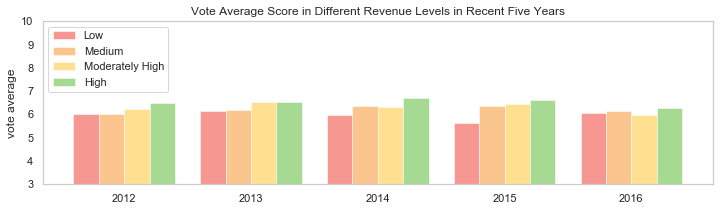

In [48]:
# Setting the positions and width for the bars
pos = list(range(len(dfq2_summary.query('revenue_levels =="Low"'))))
width = 0.2 

# Plotting the bars
fig, ax = plt.subplots(figsize=(12,3))

# Create a bar with Low data, in position pos,
plt.bar(pos, 
        #using 'Low' data,
        dfq2_summary.query('revenue_levels =="Low"')['vote_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label Low
        label= 'Low') 

# Create a bar with Medium data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using Medium data,
        dfq2_summary.query('revenue_levels =="Medium"')['vote_average'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label Medium
        label='Medium') 

# Create a bar with Moderately High data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using Moderately High data,
        dfq2_summary.query('revenue_levels =="Moderately High"')['vote_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label Moderately High
        label='Moderately High') 

# Create a bar with High data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using High data,
        dfq2_summary.query('revenue_levels =="High"')['vote_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#4fb427', 
        # with label High
        label='High')

# Set the y axis label
ax.set_ylabel('vote average')

# Set the chart's title
ax.set_title('Vote Average Score in Different Revenue Levels in Recent Five Years')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels([2012,2013,2014,2015,2016])

#set y-axis height
plt.ylim(3, 10)

# Adding the legend and showing the plot
plt.legend(loc='upper left')
plt.grid()
plt.show()

**From the chart above, we can see that there is no big difference of movie rating between each revenue level. So it can be concluded that the high revenue movies don't have the significant high score rating.**

<a id = 'conclude'></a>
## Conclusion

### For a successful movie
 - Average Budget must be around 63 millon dollar
 - Average duration of the movie must be 114 minutes
 - Any one of these should be in the cast : Samuel Jackson, Robert De Neiro, Morgan Freeman, Bruce Willis
 - Genre must be : Action, Adventure, Thriller, Comedy, Drama.
 - By doing all this the movie might be one of the hits and hence can earn an average revenue of around 262 million dollar.
 - Movies with higher revenue level are with higher popularity in recent five years.
 - Higher revenue movies don't have significant high score ratinig